## Step 1: Reading the Data into DataFrame

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [96]:
df = pd.read_csv('creditcard_sampledata_3.csv')

In [97]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 31 columns):
Unnamed: 0    5050 non-null int64
V1            5050 non-null float64
V2            5050 non-null float64
V3            5050 non-null float64
V4            5050 non-null float64
V5            5050 non-null float64
V6            5050 non-null float64
V7            5050 non-null float64
V8            5050 non-null float64
V9            5050 non-null float64
V10           5050 non-null float64
V11           5050 non-null float64
V12           5050 non-null float64
V13           5050 non-null float64
V14           5050 non-null float64
V15           5050 non-null float64
V16           5050 non-null float64
V17           5050 non-null float64
V18           5050 non-null float64
V19           5050 non-null float64
V20           5050 non-null float64
V21           5050 non-null float64
V22           5050 non-null float64
V23           5050 non-null float64
V24           5050 non-null flo

Getting the Count of Fraudulent vs Non-Fraudelent Cases

In [98]:
occ = df.Class.value_counts()
print(occ)

0    5000
1      50
Name: Class, dtype: int64


Getting the Ratio of 0 to 1

In [99]:
print(occ/df['Class'].count())

0    0.990099
1    0.009901
Name: Class, dtype: float64


Since there are Only a Few Cases of Frauds 0.9% of total,  there's little data to learn about how to identify them.
This is a case of `Class Imbalance`.

In [100]:
def prep_data(dataframe):
    y = dataframe.Class.values
    X = dataframe.drop(['Unnamed: 0' , 'V1', 'Class'] , axis = 1).values
    return X,y
              

**Plotting the Ratio of this Imbalance** <br>
visualizing the fraud to non-fraud ratio

In [101]:
def plot(X,y):
    plt.scatter(X[y == 0,0] , X[ y ==0,1 ], label = 'Class #0' , alpha = 0.5, linewidth= 0.15)
    plt.scatter(X[y == 1,0] , X[ y ==1,1 ], label = 'Class #1' , alpha = 0.5, linewidth= 0.15 ,  c = 'r')
    plt.legend()
    plt.show()
    



In [102]:
y==1,1

(array([False, False, False, ...,  True,  True,  True]), 1)

In [103]:
X,y = prep_data(df)

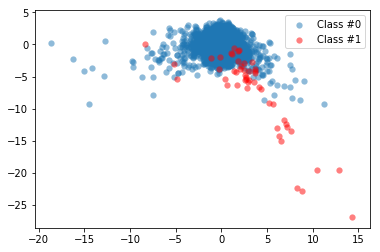

In [104]:
plot(X,y)

In [105]:
y[:5]

array([0, 0, 0, 0, 0])

In [106]:
df.head(1)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.01079,189.0,0


In [107]:
X.shape

(5050, 28)

In [108]:
X[1]

array([-1.68187486e+00,  5.33349336e-01, -3.26064341e-01, -1.45560260e+00,
        1.01831722e-01, -5.20590367e-01,  1.14036026e-01, -6.01759617e-01,
        4.44011205e-01,  1.52157013e+00,  4.99202119e-01, -1.27848981e-01,
       -2.37253049e-01, -7.52351221e-01,  6.67190352e-01,  7.24785310e-01,
       -1.73661453e+00,  7.02087839e-01,  6.38185555e-01,  1.16897942e-01,
       -3.04605373e-01, -1.25546963e-01,  2.44847768e-01,  6.91630813e-02,
       -4.60711621e-01, -1.70682293e-02,  6.35420640e-02,  3.15170000e+02])

**As we can see immediately see how our fraud cases are scattered over our data, and how few are cases we have 
 to learn about Fraud, now we will visually explore how to deal with this `Imbalance Problem`** 

## Data ReSampling
ROS(overSample minority) RUS(Undersample Majority) SMOTE(Synthetic Minority OverSampling Technique)
we are going to use SMOTE.

In [109]:
np.unique(y, return_counts= True)

(array([0, 1]), array([5000,   50]))

We're going to re-balance our data using the Synthetic Minority Over-sampling Technique (SMOTE) creating new, synthetic, samples that are quite similar to the existing observations in the minority class.

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
#!pip install imblearn 

In [83]:
sm=SMOTE(random_state=42)

In [84]:
X_res,y_res=sm.fit_resample(X,y)

In [86]:
np.unique(y_res, return_counts= True)

(array([0, 1]), array([5000, 5000]))

## Building a Basic Regression model

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [88]:
#Splitting the Data

X_train, X_test, y_train, y_test  = train_test_split(X_res,y_res,test_size = 0.3, random_state = 100)

In [89]:
model = LogisticRegression()

In [90]:
model.fit(X_train,y_train)

/Users/sachinkun21/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
y_pred = model.predict(X_test)

In [92]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1495\n           1       1.00      1.00      1.00      1505\n\n   micro avg       1.00      1.00      1.00      3000\n   macro avg       1.00      1.00      1.00      3000\nweighted avg       1.00      1.00      1.00      3000\n'

In [93]:
confusion_matrix(y_test,y_pred)

array([[1491,    4],
       [   3, 1502]])

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9976666666666667